In [ ]:
In this jupiter notebook, we lead some seasonality analysis on the data. We decompose data into trend, seasonality, and noise.

In [ ]:
import pandas as pd
import numpy as np

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

In [ ]:
categories = np.load('/kaggle/input/timeseris/categories.npy')
categories.shape

(48000,)

In [ ]:
valid_periods = np.load('/kaggle/input/timeseris/valid_periods.npy')
valid_periods.shape

(48000, 2)

Find out the shortest and longest interval in the time series.

In [ ]:
min, max = (9999, -1), (0, -1)
for i, tuple in enumerate(valid_periods):
    diff = tuple[1] - tuple[0]
    if diff < min[0]: min = (diff, i)
    if diff > max[0]: max = (diff, i)

min, max

((24, 47852), (2776, 17143))

In [ ]:
index_shortest = min[1]
index_longest = max[1]

In [ ]:
training_data = np.load('/kaggle/input/timeseris/training_data.npy')
training_data.shape

(48000, 2776)

In [ ]:
training_data_df = pd.DataFrame(training_data)
training_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48000 entries, 0 to 47999
Columns: 2776 entries, 0 to 2775
dtypes: float64(2776)
memory usage: 1016.6 MB


In [ ]:
training_data_df = training_data_df.astype(np.float32)
training_data_df.info()
training_data_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48000 entries, 0 to 47999
Columns: 2776 entries, 0 to 2775
dtypes: float32(2776)
memory usage: 508.3 MB


,0,1,2,3,4,5,6,7,8,9,...,2766,2767,2768,2769,2770,2771,2772,2773,2774,2775
count,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,...,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000
mean,0.000004,0.000004,0.000004,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,...,0.515814,0.520281,0.528503,0.533299,0.530825,0.525855,0.522132,0.523433,0.530226,0.531927
std,0.000837,0.000813,0.000781,0.000760,0.000757,0.000749,0.000745,0.000741,0.000741,0.000733,...,0.288777,0.289387,0.287716,0.288655,0.289785,0.291925,0.296271,0.302170,0.303567,0.304784
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.260870,0.265976,0.275296,0.276525,0.269440,0.259259,0.246887,0.242881,0.246772,0.244700
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.529901,0.535940,0.546886,0.556100,0.552312,0.544393,0.542242,0.550017,0.561833,0.564695
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.774056,0.781060,0.788449,0.795617,0.794872,0.793385,0.794734,0.802337,0.809368,0.815334
max,0.183319,0.178061,0.171051,0.166542,0.165793,0.164041,0.163324,0.162288,0.162288,0.160536,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
sample_first = training_data_df.T[0]
sample_shortest = training_data_df.T[index_shortest]
sample_longest = training_data_df.T[index_longest]

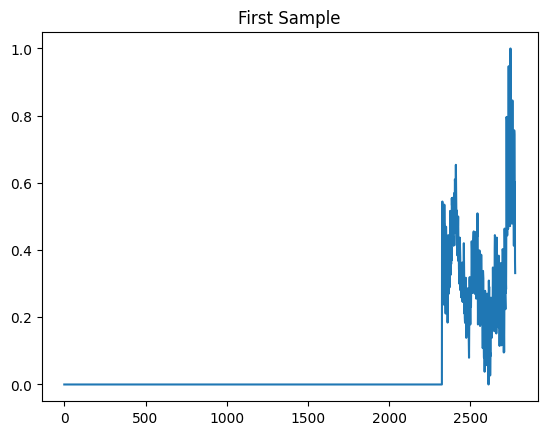

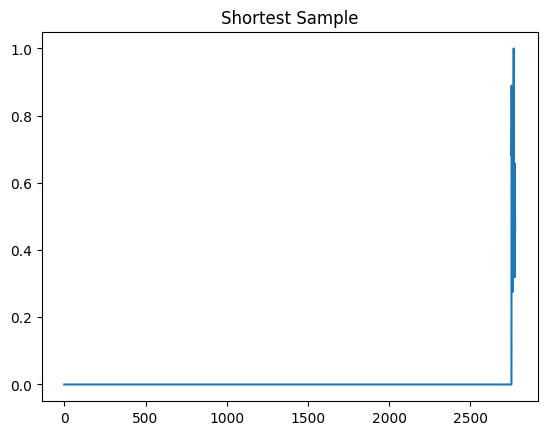

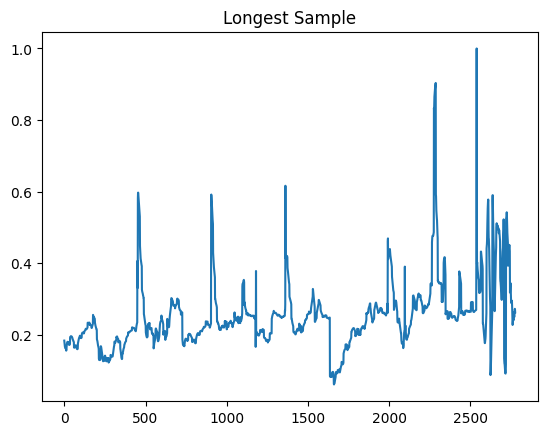

In [ ]:
import matplotlib.pyplot as plt

plt.plot(sample_first)
plt.title('First Sample')
plt.show()

plt.plot(sample_shortest)
plt.title('Shortest Sample')
plt.show()

plt.plot(sample_longest)
plt.title('Longest Sample')
plt.show()

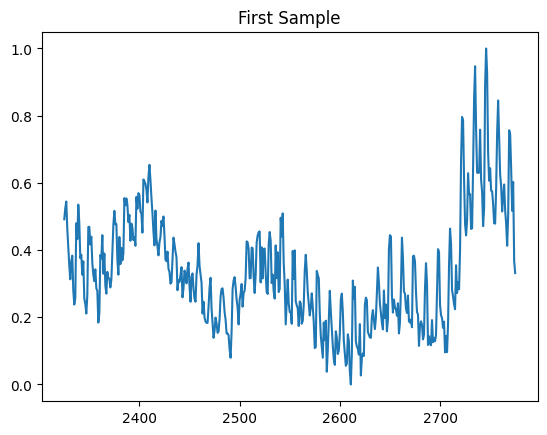

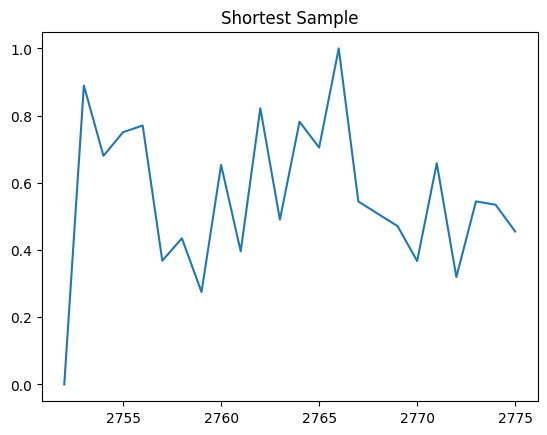

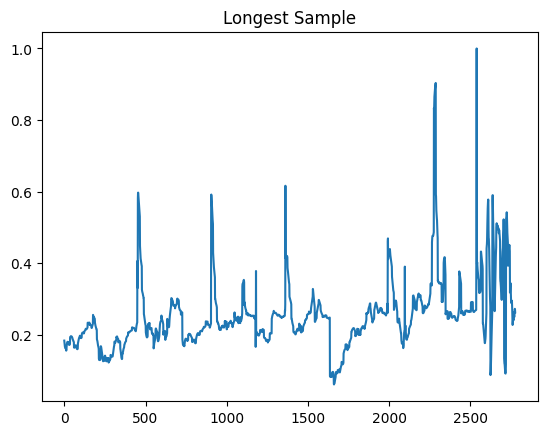

In [ ]:
start_first, end_first = valid_periods[0]
sample_first_trimmed = sample_first[start_first:end_first]

plt.plot(sample_first_trimmed)
plt.title('First Sample')
plt.show()



start_shortest, end_shortest = valid_periods[index_shortest]
sample_shortest_trimmed = sample_shortest[start_shortest:end_shortest]

plt.plot(sample_shortest_trimmed)
plt.title('Shortest Sample')
plt.show()



start_longest, end_longest = valid_periods[index_longest]
sample_longest_trimmed = sample_longest[start_longest:end_longest]

plt.plot(sample_longest_trimmed)
plt.title('Longest Sample')
plt.show()


In [ ]:
category_counts = np.unique(categories, return_counts=True)
for category, count in zip(category_counts[0], category_counts[1]):
    print(f"Category {category}: {count}")

Category A: 5728
Category B: 10987
Category C: 10017
Category D: 10016
Category E: 10975
Category F: 277


In [ ]:
lengths = valid_periods[:, 1] - valid_periods[:, 0]

intervals = [(0, 300), (301, 600), (601, 900), (901, 1200), (1201, 1500),
             (1501, 1800), (1801, 2100), (2101, 2400), (2401, 2776)]

interval_counts = {category: {interval: 0 for interval in intervals} for category in 'ABCDEF'}

for category, length in zip(categories, lengths):
    for interval in intervals:
        if interval[0] <= length < interval[1]:
            interval_counts[category][interval] += 1
            break

interval_counts_df = pd.DataFrame(interval_counts)

interval_ranges = [f"{start}-{end}" for start, end in intervals]
interval_counts_df.index = interval_ranges

interval_counts_df

,A,B,C,D,E,F
0-300,4276,10145,8527,7712,10320,230
301-600,1368,722,1235,2094,571,40
601-900,71,67,143,115,30,6
901-1200,1,3,17,5,5,1
1201-1500,0,3,3,2,3,0
1501-1800,0,0,2,0,0,0
1801-2100,1,0,0,3,0,0
2101-2400,0,0,1,0,1,0
2401-2776,0,0,2,1,0,0


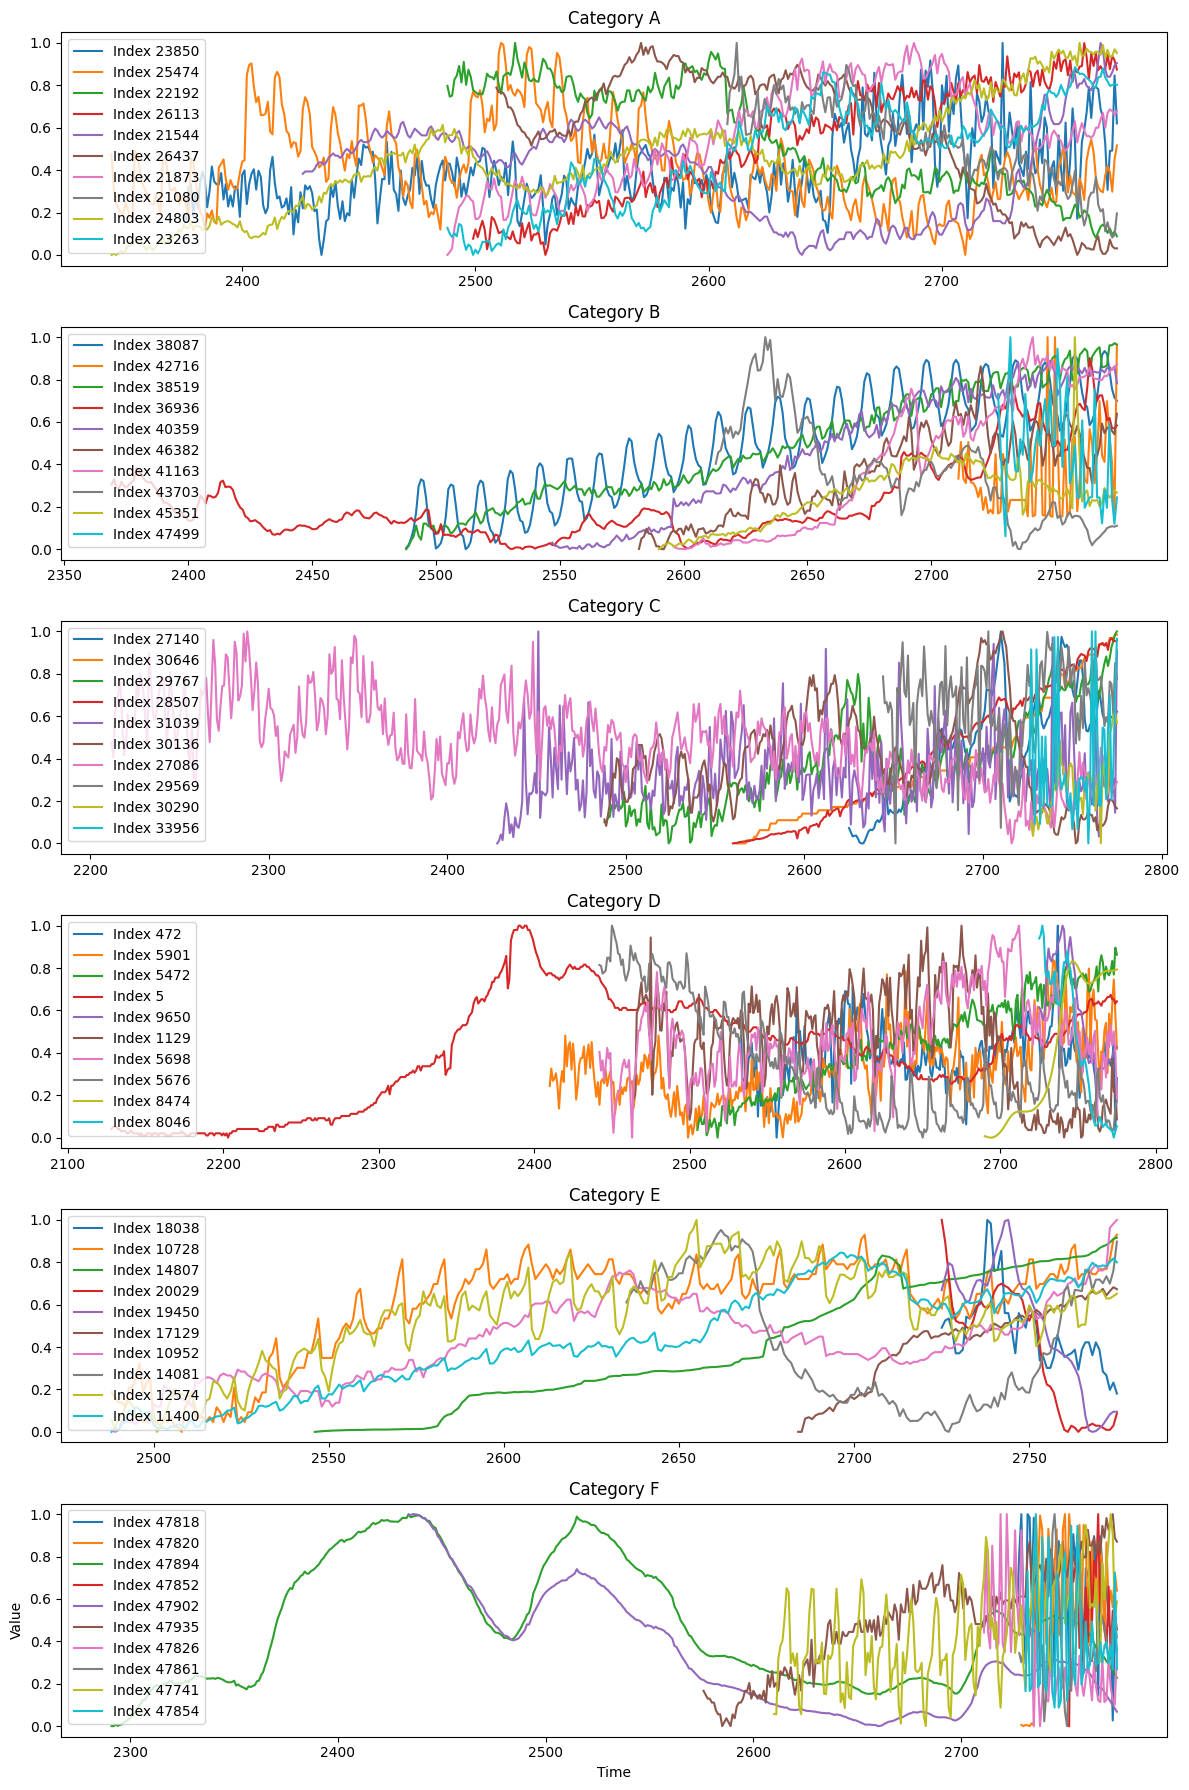

In [ ]:
# Plot 10 time series for each category
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(12, 18))
for i, category in enumerate(np.unique(categories)):
    # Get the indices of the time series for this category
    indices = np.where(categories == category)[0]
    # Randomly choose 10 indices from this category
    chosen_indices = np.random.choice(indices, 10, replace=False)

    for ts_index in chosen_indices:
        # Find the valid period for this time series
        start, end = valid_periods[ts_index]
        # Plot the time series data for its valid period
        axes[i].plot(range(start, end), training_data[ts_index, start:end], label=f'Index {ts_index}')

    axes[i].set_title(f'Category {category}')
    axes[i].legend()

plt.xlabel('Time')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

In [ ]:
# Import the necessary function from statsmodels
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Prepare the data for Tukey's HSD test
data_for_tukey = np.array([(length, category) for length, category in zip(lengths, categories)])
lengths_for_tukey = data_for_tukey[:, 0].astype(float)
categories_for_tukey = data_for_tukey[:, 1]

# Perform Tukey's HSD test
tukey_result = pairwise_tukeyhsd(lengths_for_tukey, categories_for_tukey)
print(tukey_result)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
     A      B -112.2375    0.0 -118.3821 -106.0929   True
     A      C  -70.0341    0.0  -76.2798  -63.7883   True
     A      D  -61.1894    0.0  -67.4353  -54.9436   True
     A      E -115.1343    0.0 -121.2801 -108.9885   True
     A      F    -83.35    0.0 -106.5453  -60.1548   True
     B      C   42.2034    0.0   36.9947   47.4121   True
     B      D   51.0481    0.0   45.8393   56.2569   True
     B      E   -2.8968 0.5836   -7.9852    2.1915  False
     B      F   28.8875 0.0045    5.9497   51.8252   True
     C      D    8.8447    0.0    3.5169   14.1724   True
     C      E  -45.1002    0.0  -50.3103  -39.8902   True
     C      F  -13.3159 0.5635   -36.281    9.6491  False
     D      E  -53.9449    0.0  -59.1551  -48.7347   True
     D      F  -22.1606 0.0658  -45.1257    0.8045  False
     E      F 

In [ ]:
mean_lengths = {}
for category in np.unique(categories):
    mean_lengths[category] = lengths[categories == category].mean()

print('MEAN LENGHTS')
mean_lengths

MEAN LENGHTS


{'A': 278.18034217877096,
 'B': 165.9428415400018,
 'C': 208.14625137266646,
 'D': 216.9909145367412,
 'E': 163.04601366742597,
 'F': 194.8303249097473}

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
reshaped_categories = categories.reshape(-1, 1)
onehot_categories = encoder.fit_transform(reshaped_categories)

onehot_categories

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]])

In [ ]:
from sklearn.model_selection import train_test_split

# Split the indices of the time series into training and validation sets
train_indices, val_indices = train_test_split(np.arange(len(training_data_df)), test_size=0.2, random_state=42, stratify=categories)

# Use these indices to create training and validation sets
train_set = training_data_df.iloc[train_indices]
valid_periods_train = valid_periods[train_indices]
onehot_categories_train = onehot_categories[train_indices]

val_set = training_data_df.iloc[val_indices]
valid_periods_val = valid_periods[val_indices]
onehot_categories_val = onehot_categories[val_indices]

train_set.shape, valid_periods_train.shape, onehot_categories_train.shape, val_set.shape, valid_periods_val.shape, onehot_categories_val.shape

((38400, 2776), (38400, 2), (38400, 6), (9600, 2776), (9600, 2), (9600, 6))

In [ ]:
def calculate_padding_length(sq, w, t, s):
    cycle = w + t
    if sq <= cycle: return cycle - sq
    else:
        m = (sq - cycle) % s
        if m == 0: return m
        else: return s - m

In [ ]:
def create_sequences(df, valid_periods, categories, window, telescope, stride=1):

    input_sequences = []
    input_categories = []
    output_sequences = []


    for i in range(len(valid_periods)):
        start, end = valid_periods[i]
        category = categories[i]

        sequence = df.iloc[i, start:end].values

        padding_length = calculate_padding_length(len(sequence), window, telescope, stride)
        sequence = np.pad(sequence, (padding_length, 0), mode='constant', constant_values=0)

        for j in range(0, len(sequence) - window - telescope + 1, stride):
            input_seq = sequence[j:(j + window)]
            output_seq = sequence[(j + window):(j + window + telescope)]

            input_sequences.append(input_seq)
            input_categories.append(category)
            output_sequences.append(output_seq)

    return np.array(input_sequences), np.array(input_categories), np.array(output_sequences)

In [ ]:
window = 100
telescope = 9
stride = 10

In [ ]:
X_train, X_train_category, y_train = create_sequences(train_set, valid_periods_train, onehot_categories_train, window, telescope, stride)
X_val, X_val_category, y_val = create_sequences(val_set, valid_periods_val, onehot_categories_val, window, telescope, stride)
X_train.shape, X_train_category.shape, y_train.shape, X_val.shape, X_val_category.shape, y_val.shape

((452922, 100),
 (452922, 6),
 (452922, 9),
 (114312, 100),
 (114312, 6),
 (114312, 9))

In [ ]:
def extract_valid_data(training_data, valid_periods, filter=600):
    valid_data = []
    valid_categories = []
    for i in range(len(training_data)):
        start, end = valid_periods[i]
        if len(training_data[i, start:end]) <= filter:
        # Pad with zeros if shorter than filter
            valid_data.append(np.pad(training_data[i, start:end], (0, filter - len(training_data[i, start:end])), 'constant'))
            valid_categories.append(categories[i])
    return np.array(valid_data), np.array(valid_categories)

6

In [ ]:
filtered_data,valid_categories  = extract_valid_data(training_data, valid_periods)

In [ ]:
filtered_data.shape

(47455, 600)

In [ ]:


# Corresponding categories for the filtered data
# Create a DataFrame with filtered categories and adjusted data
df_filtered_adjusted = pd.DataFrame({
    'category': valid_categories,
    'adjusted_data': list(filtered_data)
})

600

In [ ]:
aggregated_filtered_data = df_filtered_adjusted.groupby('category')['adjusted_data'].apply(lambda x: np.mean(np.vstack(x), axis=0))
aggregated_filtered_data.info
decomposition_results_filtered = {}
for category, data in aggregated_filtered_data.items():
    # Placeholder period, to be determined based on data characteristics
    period = 15
    decomposition = seasonal_decompose(data, model='additive', period=period)
    decomposition_results_filtered[category] = decomposition

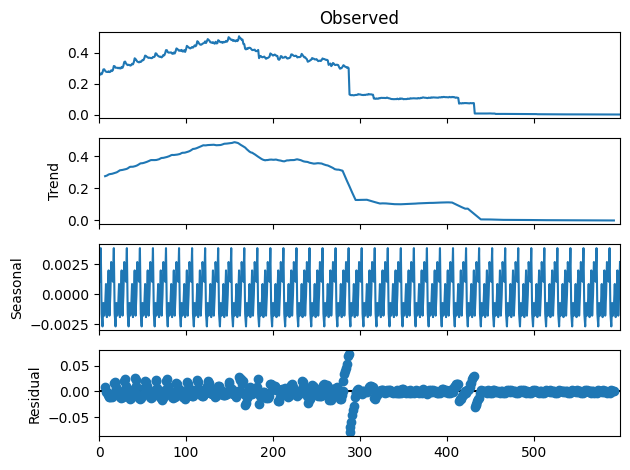

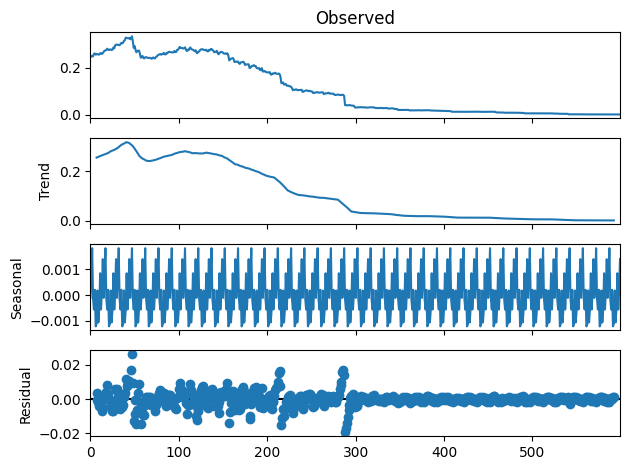

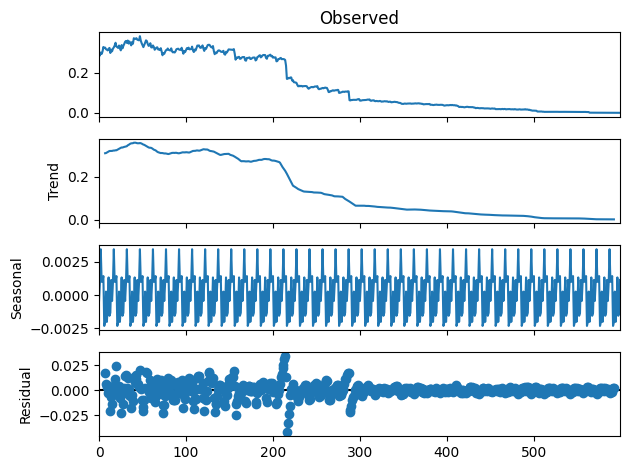

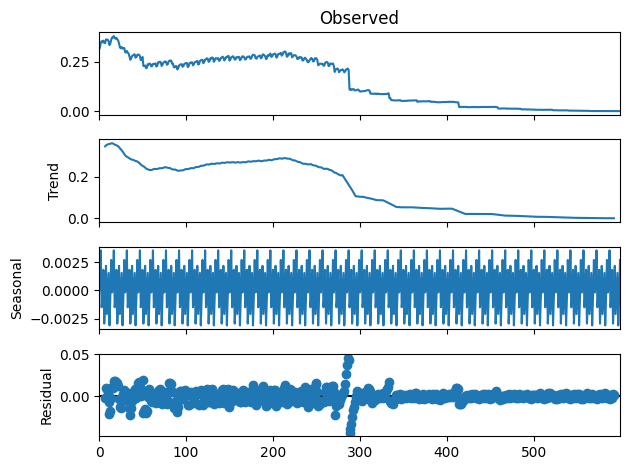

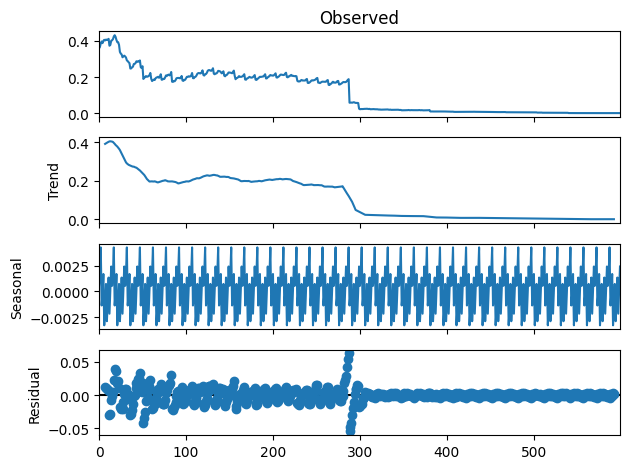

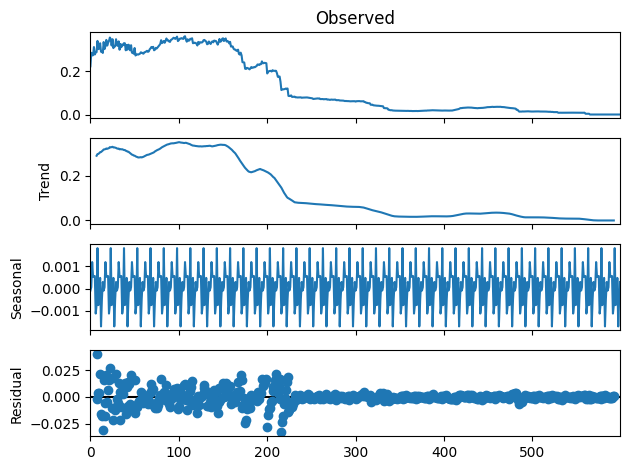

In [ ]:
# Plotting the decomposition results for each category
#fig, axs = plt.subplots(len(decomposition_results_filtered), 1, figsize=(10, 6 * len(decomposition_results_filtered)))
for i, (category, decomposition) in enumerate(decomposition_results_filtered.items()):
    decomposition.plot()
    decomposition.title=category
    plt.tight_layout()
    plt.show()

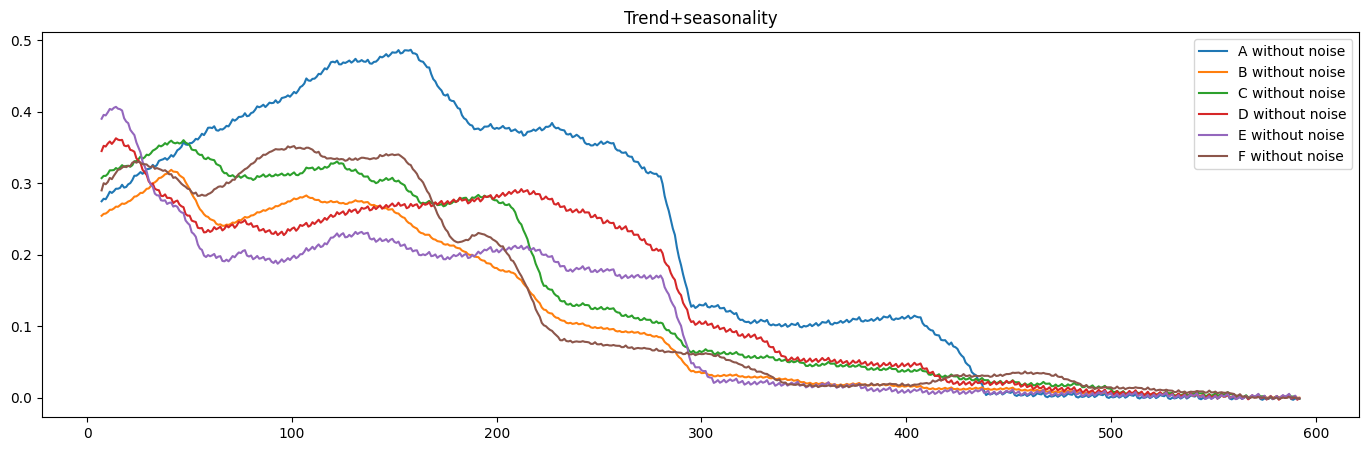

In [ ]:
plt.figure(figsize=(17,5))

for i, (category, decomposition) in enumerate(decomposition_results_filtered.items()):
    plt.plot(decomposition.trend + decomposition.seasonal, label=f'{category} without noise')
    plt.title('Trend+seasonality')
    plt.legend()
plt.show()

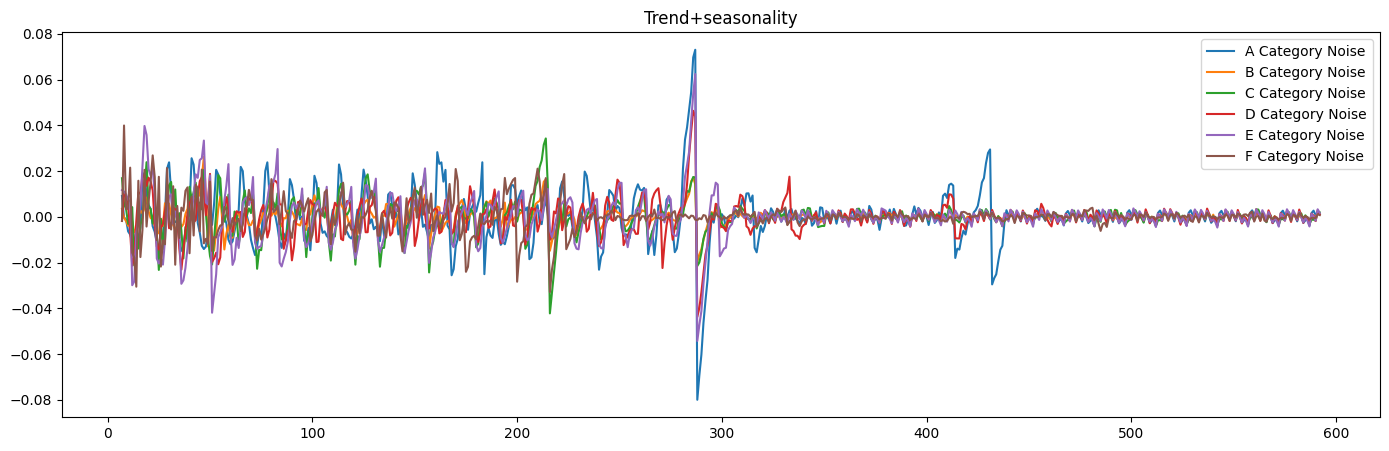

In [ ]:
plt.figure(figsize=(17,5))

for i, (category, decomposition) in enumerate(decomposition_results_filtered.items()):
    plt.plot(decomposition.resid, label=f'{category} Category Noise')
    plt.title('Trend+seasonality')
    plt.legend()
plt.show()

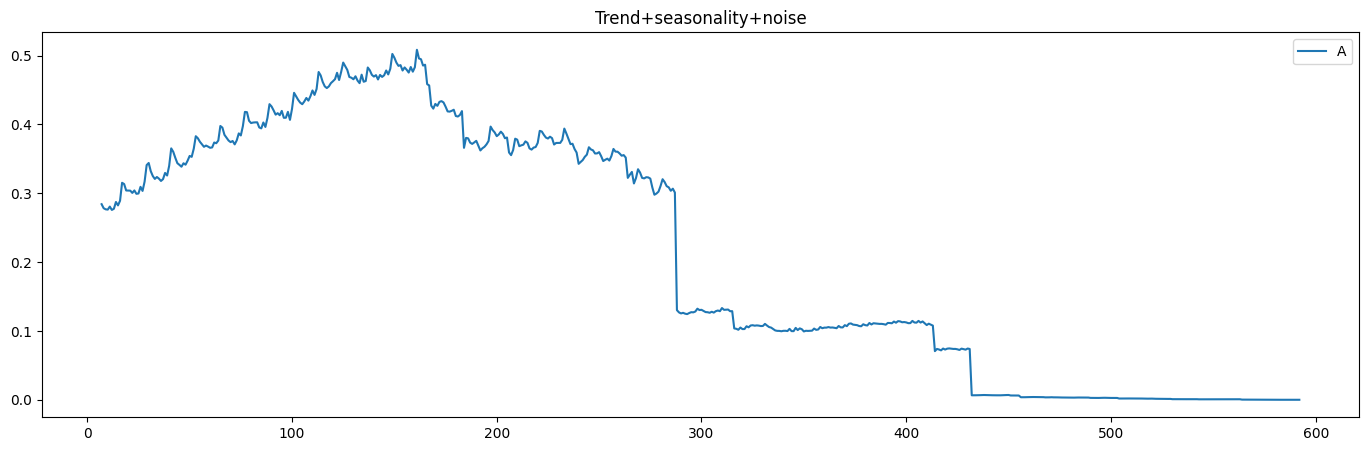

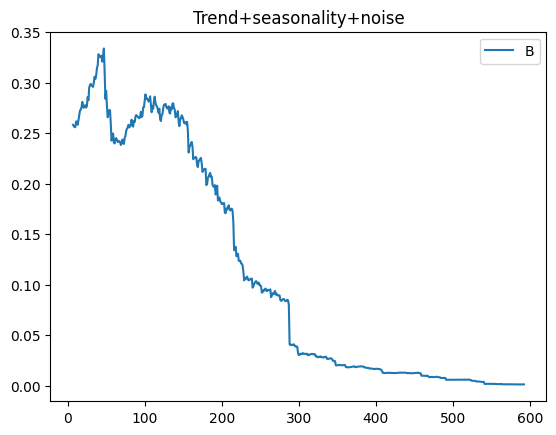

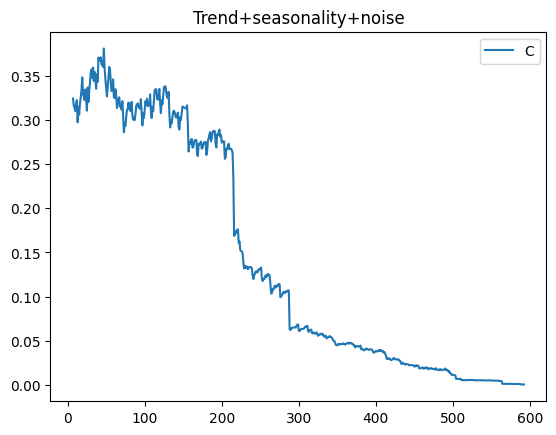

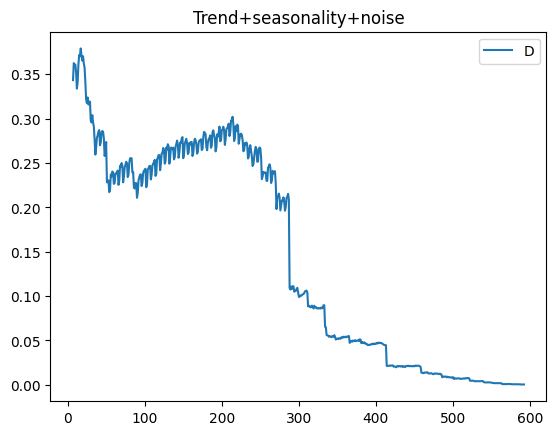

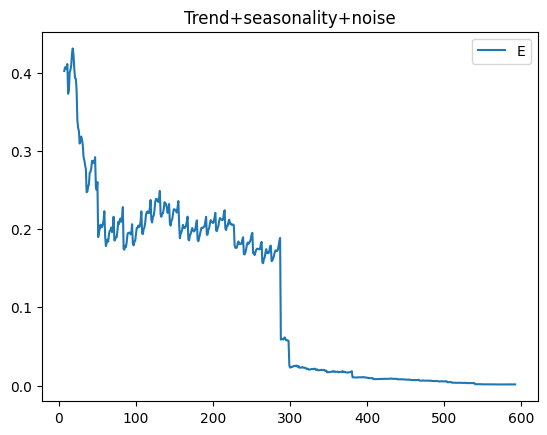

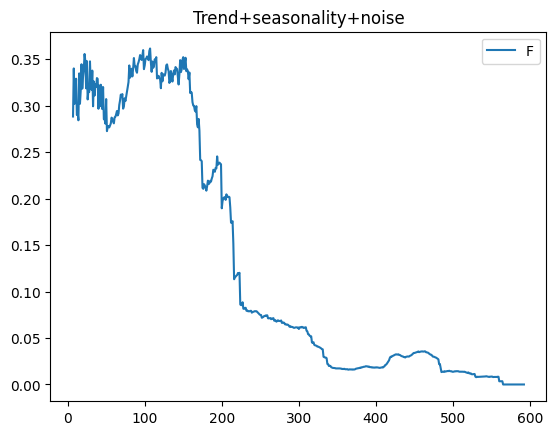

In [ ]:
plt.figure(figsize=(17,5))

for i, (category, decomposition) in enumerate(decomposition_results_filtered.items()):
    plt.plot(decomposition.trend + decomposition.seasonal + decomposition.resid, label=f'{category}')
    plt.title('Trend+seasonality+noise')
    plt.legend()
    plt.show()

In [ ]:
seasonality_trend_X_Train = []
for i, data in enumerate(X_train):
    # Placeholder period, to be determined based on data characteristics
    period = 15
    decomposition = seasonal_decompose(data, model='additive', period=period)
    seasonality_trend.append(decomposition.trend + decomposition.seasonal)

In [ ]:
new_X_Train = np.array(seasonality_trend).shape

(452922, 100)

In [ ]:
input_shape = (window, 1)
category_shape = (6, )
output_shape = (telescope, 1)
batch_size = 64
epochs = 50

In [ ]:
import tensorflow.keras.layers as tfkl
import tensorflow as tf

def build_CONV_LSTM_model_with_categories(input_shape, category_shape, output_shape):

    # Time series input
    time_series_input = tfkl.Input(shape=input_shape, name='time_series_input')
    x = tfkl.Bidirectional(tfkl.LSTM(64, return_sequences=True), name='bidirectional_lstm')(time_series_input)
    x = tfkl.Conv1D(128, 3, padding='same', activation='relu')(x)

    # Category input
    category_input = tfkl.Input(shape=category_shape, name='category_input')
    category_processed = tfkl.Dense(20, activation='relu')(category_input)

    # Combine the processed inputs
    combined = tfkl.Concatenate()([x, tfkl.RepeatVector(input_shape[0])(category_processed)])

    # Continue with convolutional layers
    x = tfkl.Conv1D(128, 3, padding='same', activation='relu')(combined)
    output_layer = tfkl.Conv1D(output_shape[1], 3, padding='same')(x)
    crop_size = output_layer.shape[1] - output_shape[0]
    output_layer = tfkl.Cropping1D((0, crop_size))(output_layer)

    # Construct the model
    model = tf.keras.Model(inputs=[time_series_input, category_input], outputs=output_layer, name='CONV_LSTM_with_Categories')
    model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=tf.keras.optimizers.Adam())

    return model

In [ ]:
model = build_CONV_LSTM_model_with_categories(input_shape, category_shape, output_shape)

In [ ]:
model.summary()

from tensorflow import keras as tfk
tfk.utils.plot_model(model, expand_nested=True, show_shapes=True)

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    mode='min',
    patience=15,
    restore_best_weights=True
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    mode='min',
    patience=10,
    factor=0.1,
    min_lr=1e-5
)

history = model.fit(
    x = [X_train, X_train_category],
    y = y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_data = ([X_val, X_val_category], y_val),
    callbacks = [
        early_stopping,
        reduce_lr
    ]
).history

In [ ]:
best_epoch = np.argmin(history['val_loss'])
plt.figure(figsize=(17,4))
plt.plot(history['loss'], label='Training loss', alpha=.8, color='#ff7f0e')
plt.plot(history['val_loss'], label='Validation loss', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('Mean Squared Error (Loss)')
plt.legend()
plt.grid(alpha=.3)
plt.show()

plt.figure(figsize=(18,3))
plt.plot(history['lr'], label='Learning Rate', alpha=.8, color='#ff7f0e')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.legend()
plt.grid(alpha=.3)
plt.show()

In [ ]:
preds = model.predict([X_val, X_val_category])

In [ ]:
preds.shape

In [ ]:
model.save('conv_lstm_tp9_ws100')

In [ ]:
!zip -r conv_lstm_tp9_ws100.zip /kaggle/working/conv_lstm_tp9_ws100